# AT1 Example III: Classification problem
Load the dataset from Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/IntroAILab/AT3

/content/drive/MyDrive/IntroAILab/AT2


Download the necessary libraries.

In [ ]:
pip install ucimlrepo

The following is the library used for the experiment.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import metrics
from ucimlrepo import fetch_ucirepo
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout

### Finding a dataset.

The dataset consists of 2111 instances and 16 features.

Here is a brief explanation of the attributes of the dataset:
1. **Gender**: Category type variable, indicating the gender of the individual.
2. **Age**: Continuous variable, representing the age of an individual.
3. **Height**: Continuous variable, representing the height of an individual.
4. **Weight**: Continuous variable, indicating the weight of an individual.
5. **family_history_with_overweight**: binary variable, indicating whether an individual has a family history of obesity.
6. **FAVC**: A binary variable that indicates whether an individual regularly eats high-calorie foods.
7. **FCVC**: An integer variable that represents the frequency of vegetable intake in an individual's daily diet.
8. **NCP**: Continuous variable, representing the number of times an individual eats the main meal per day.
9. **CAEC**: A categorical variable that indicates whether an individual eats between meals.
10. **SMOKE**: binary variable, indicating whether an individual smokes.
11. **CH2O**: Continuous variable, indicating the amount of water an individual drinks every day.
12. **SCC**: A binary variable that indicates whether an individual monitors calorie intake daily.
13. **FAF**: Continuous variable, indicating the frequency of physical activity of an individual.
14. **TUE**: An integer variable that represents the amount of time an individual uses an electronic device each day.
15. **CALC**: Categorical variable, indicating the frequency of alcohol consumption by an individual.
16. **MTRANS**: Categorical variable, indicating the mode of transportation commonly used by individuals.
17. **NObeyesdad**: Category type, target variable, indicates the degree of obesity of an individual.

In [ ]:
# Fetch the dataset.
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Target variables X and feature variables y.
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

Observe the structure of the data set.

In [ ]:
# The metadata.
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata

{'uci_id': 544,
 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ',
 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition',
 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv',
 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification', 'Regression', 'Clustering'],
 'characteristics': ['Multivariate'],
 'num_instances': 2111,
 'num_features': 16,
 'feature_types': ['Integer'],
 'demographics': ['Gender', 'Age'],
 'target_col': ['NObeyesdad'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2019,
 'last_updated': 'Tue Sep 10 2024',
 'dataset_doi': '10.24432/C5H31Z',
 'creators': [],
 'intro_paper': 

In [ ]:
# The variable information.
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables

,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


Observe a few examples.

In [ ]:
# maximum number of columns displayed.
pd.set_option('display.max_columns', 16)
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


### Data prepration

#### Characteristic variable analysis

Noncategorical properties of a statistical feature variable.

In [ ]:
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Generate histograms for each numeric column.

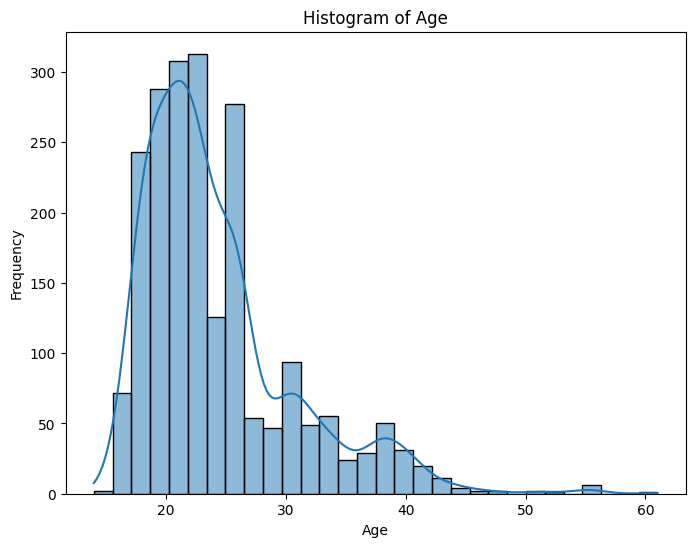

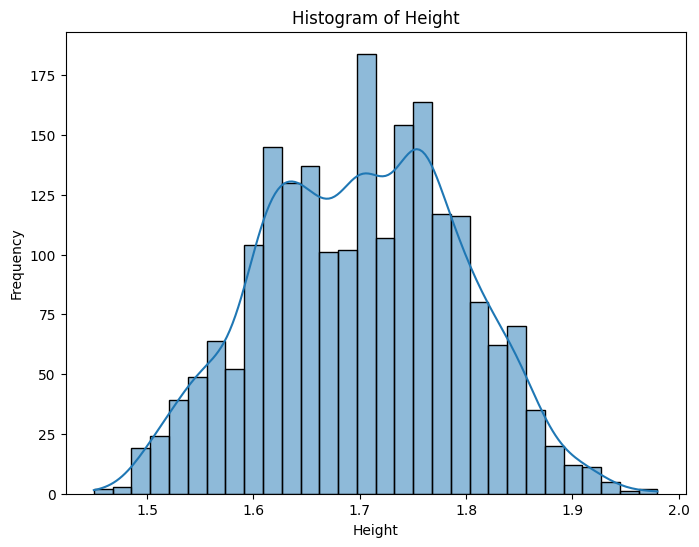

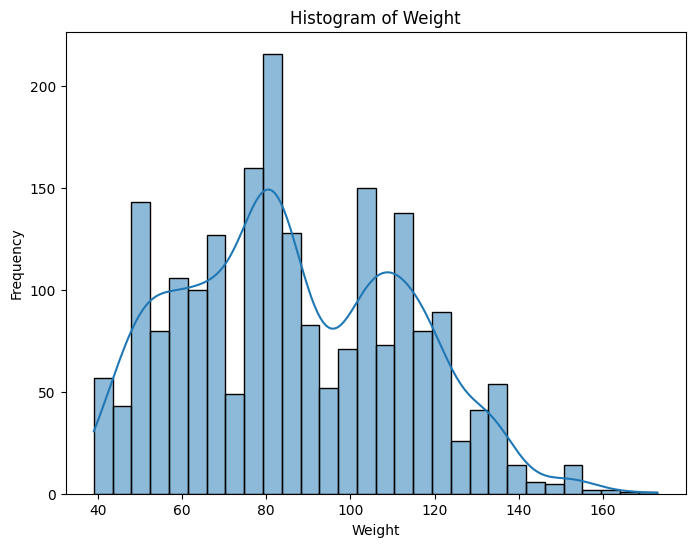

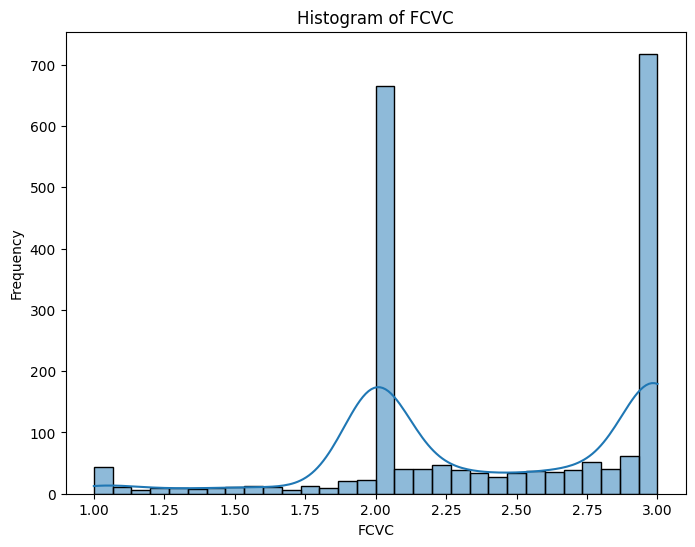

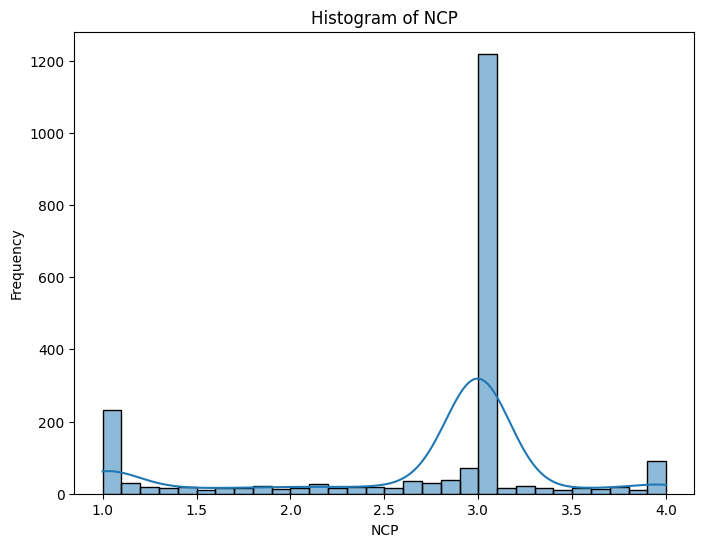

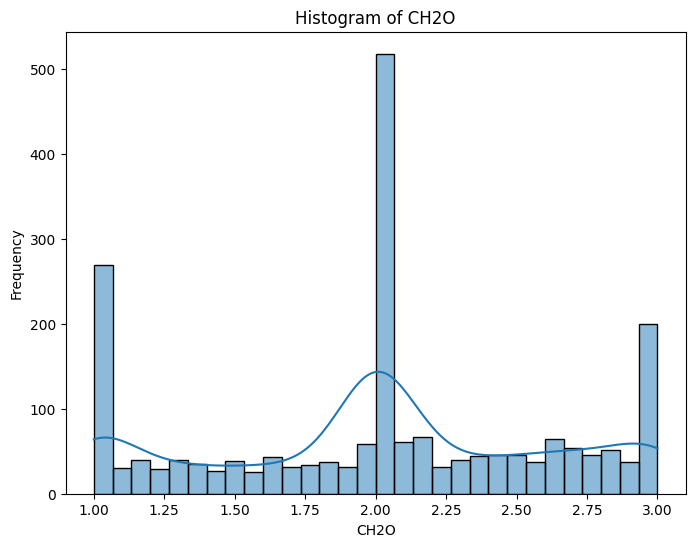

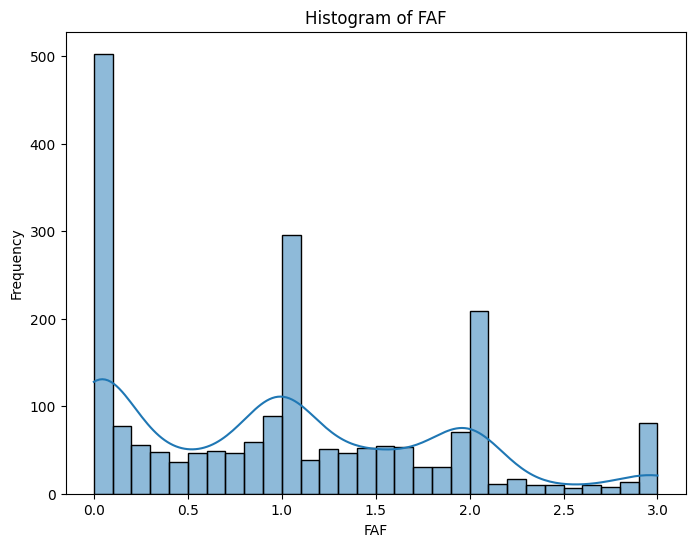

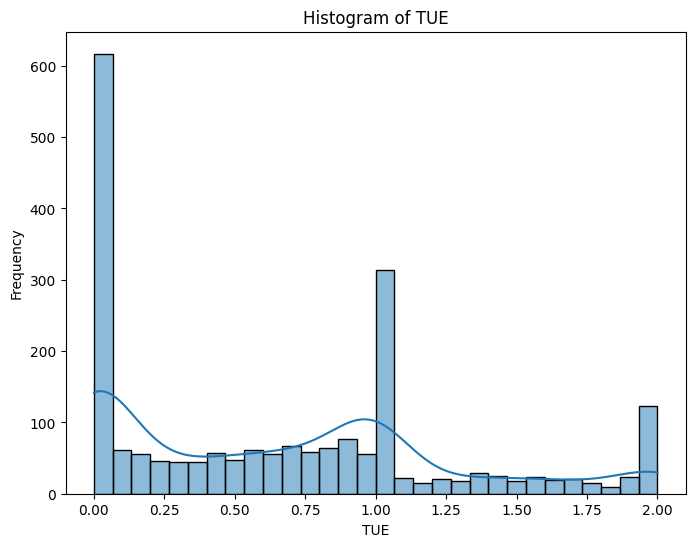

In [ ]:
for column in X.select_dtypes(include=['int64', 'float64']).columns:
    # Set figure size
    plt.figure(figsize=(8, 6))
    # Create histogram with kernel density estimation
    sns.histplot(X[column], bins=30, kde=True)
    # Set the title and label the axes.
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.show()

Statistical dataset discrete attributes.

In [ ]:
# Print the number of categories
print(X['Gender'].value_counts())
print(X['family_history_with_overweight'].value_counts())
print(X['FAVC'].value_counts())
print(X['CAEC'].value_counts())
print(X['SMOKE'].value_counts())
print(X['SCC'].value_counts())
print(X['CALC'].value_counts())
print(X['MTRANS'].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


Encode discrete attributes (SVM).

In [ ]:
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['family_history_with_overweight'] = label_encoder.fit_transform(X['family_history_with_overweight'])
X['FAVC'] = label_encoder.fit_transform(X['FAVC'])
X['CAEC'] = label_encoder.fit_transform(X['CAEC'])
X['SMOKE'] = label_encoder.fit_transform(X['SMOKE'])
X['SCC'] = label_encoder.fit_transform(X['SCC'])
X['CALC'] = label_encoder.fit_transform(X['CALC'])
X['MTRANS'] = label_encoder.fit_transform(X['MTRANS'])

<ipython-input-9-4e6858154249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = label_encoder.fit_transform(X['Gender'])
<ipython-input-9-4e6858154249>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['family_history_with_overweight'] = label_encoder.fit_transform(X['family_history_with_overweight'])
<ipython-input-9-4e6858154249>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

#### Target variable analysis

Statistical data set classification targets.

In [ ]:
y.value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


Encode the target label.

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print the number of each class
unique_classes, class_counts = np.unique(y_encoded, return_counts=True)
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count}")

Class 0: 272
Class 1: 287
Class 2: 351
Class 3: 297
Class 4: 324
Class 5: 290
Class 6: 290


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Split the dataset into the training and test datasets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=45)

### Support vector machine model

#### Train a support vector machine model via using SVC() in sklearn.

In [ ]:
model = SVC()
# Training the model.
model.fit(X_train, y_train)

Evaluate the model.

In [ ]:
# Predict the model via the test set.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("Training set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_train, y_train_pred)
print("Training set r2 score: {:5.2f}".format(r2_test))

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

Training set Mean Abs Error:  1.01
Training set r2 score:  0.10
Accuracy: 0.591824644549763


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_test, y_test_pred)
print("Testing set r2 score: {:5.2f}".format(r2_test))

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Testing set Mean Abs Error:  1.07
Testing set r2 score:  0.08
Accuracy: 0.5768321513002365


Display the confusion matrix in training set.

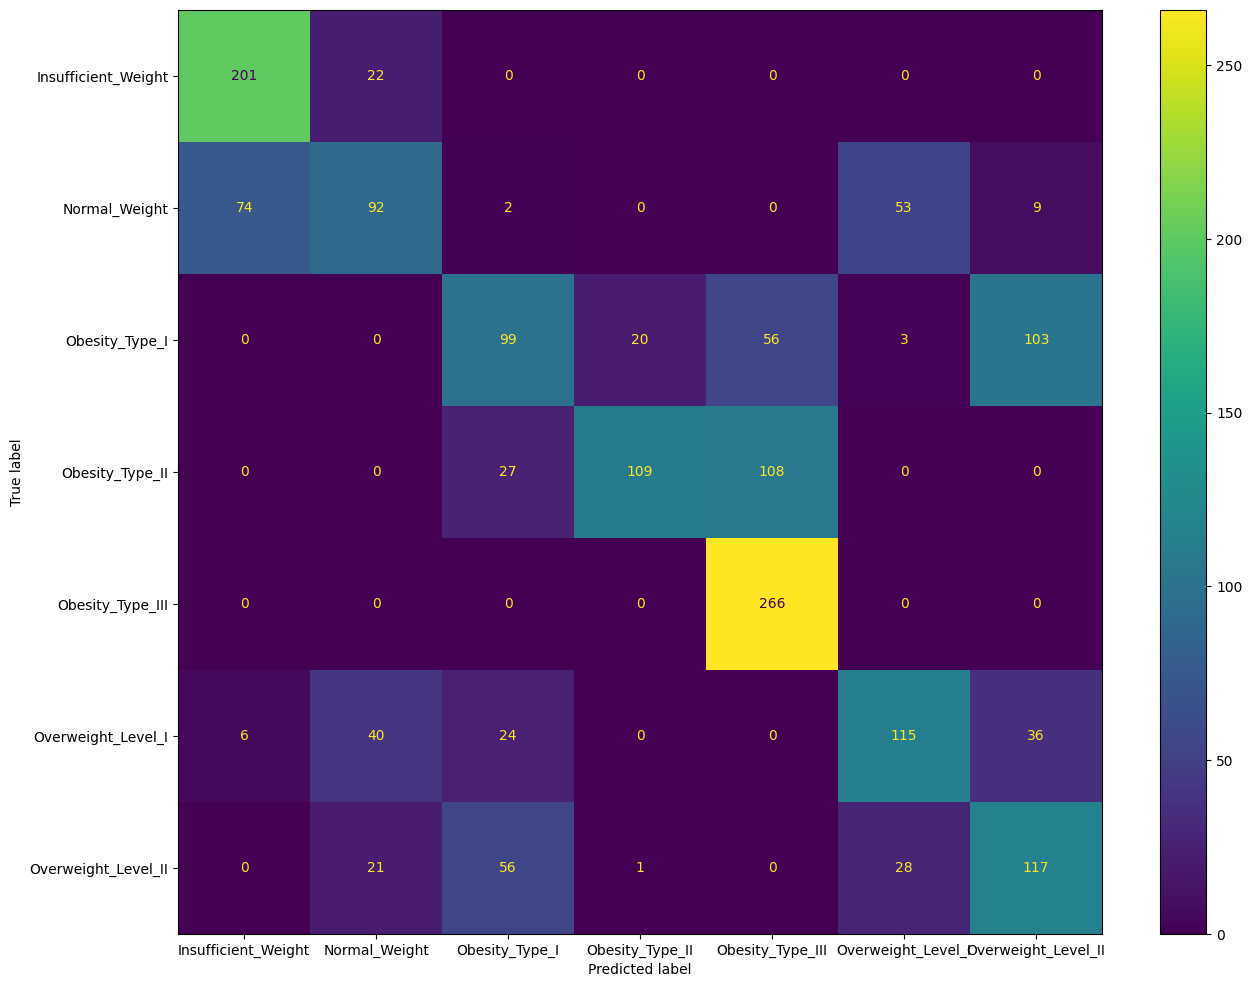

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12), dpi = 100)
cm = metrics.confusion_matrix(y_train, y_train_pred)
cmd = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II",
                                "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
cmd.plot(ax = axes)

Display the confusion matrix in testing set.

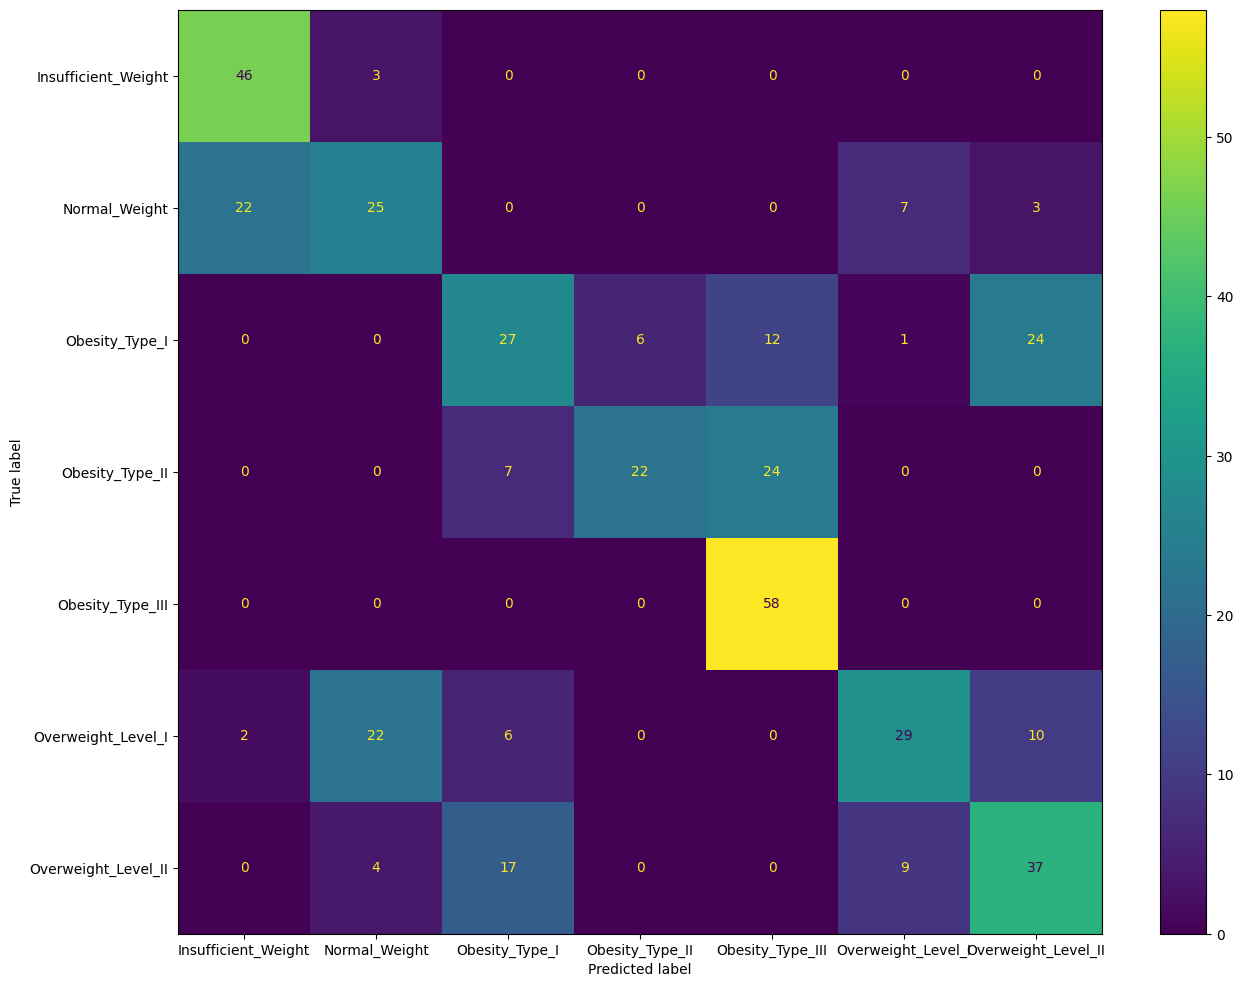

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12), dpi = 100)
cm = metrics.confusion_matrix(y_test, y_test_pred)
cmd = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II",
                                "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
cmd.plot(ax = axes)

#### Retrain the model with kernel function.

In [ ]:
model = SVC(kernel='rbf', C=1.0, gamma='auto')
# Training the model.
model.fit(X_train,y_train)

SVC(gamma='auto')

Evaluate the model with kernel function.

In [ ]:
# Predict the model via the test set.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("Training set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_train, y_train_pred)
print("Training set r2 score: {:5.2f}".format(r2_test))

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

Training set Mean Abs Error:  0.13
Training set r2 score:  0.87
Accuracy: 0.9549763033175356


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_test, y_test_pred)
print("Testing set r2 score: {:5.2f}".format(r2_test))

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Testing set Mean Abs Error:  0.29
Testing set r2 score:  0.73
Accuracy: 0.900709219858156


Display the confusion matrix in training set.

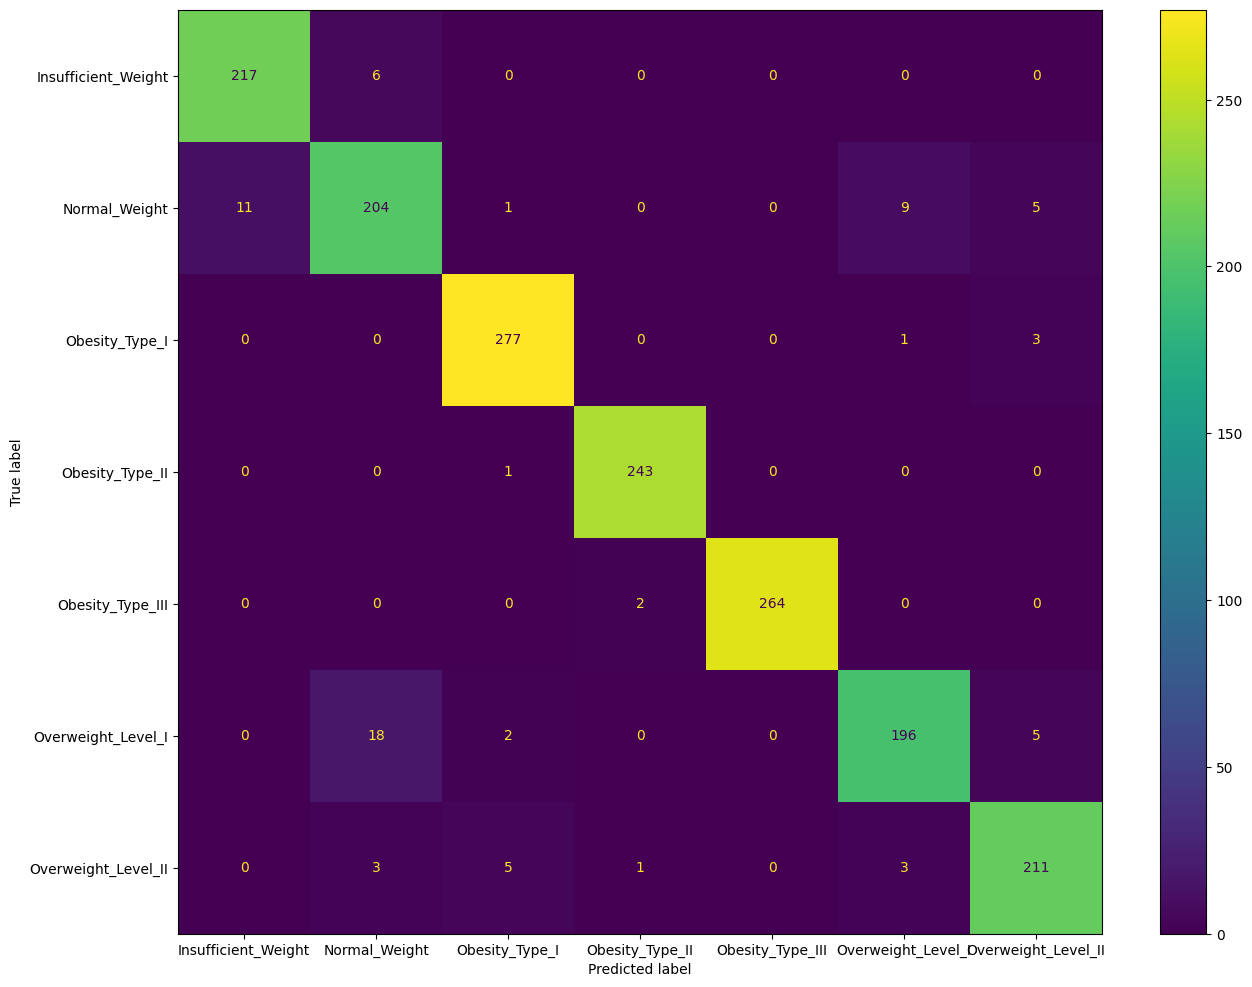

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12), dpi = 100)
cm = metrics.confusion_matrix(y_train, y_train_pred)
cmd = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II",
                                "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
cmd.plot(ax = axes)

Display the confusion matrix in testing set.

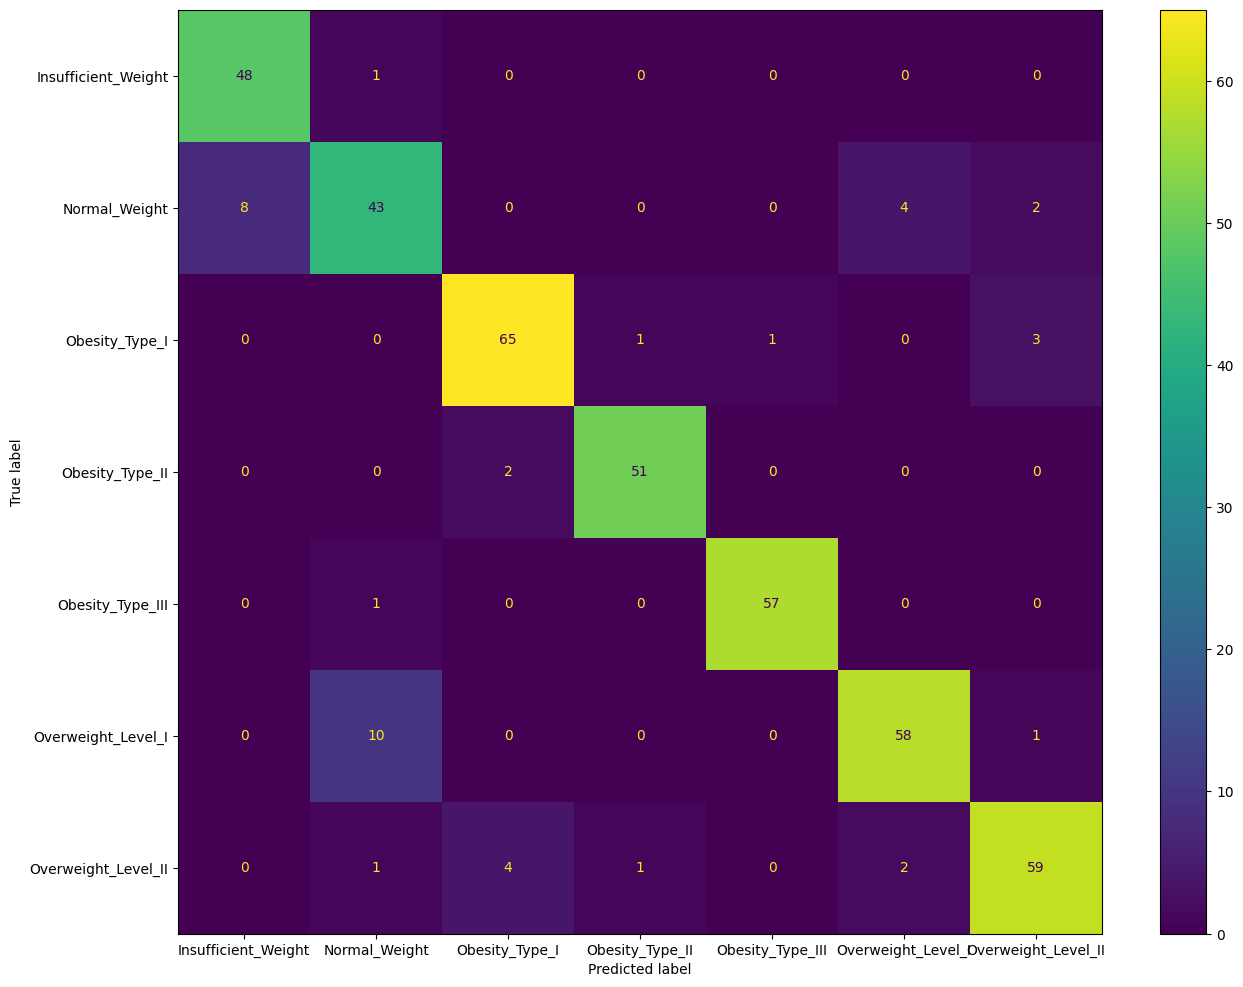

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12), dpi = 100)
cm = metrics.confusion_matrix(y_test, y_test_pred)
cmd = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II",
                                "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
cmd.plot(ax = axes)

### Neural network classification

Divide the feature variables by type.

In [ ]:
def prepare_x(x):
    # Select all categorical data from the dataframe
    categorical_data = x.select_dtypes(include=['object'])
    # Select all continuous data from the dataframe
    continuous_data = x.select_dtypes(include=['int64', 'float64'])

    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to each categorical feature
    categorical_data['Gender'] = label_encoder.fit_transform(categorical_data['Gender'])
    categorical_data['family_history_with_overweight'] = label_encoder.fit_transform(categorical_data['family_history_with_overweight'])
    categorical_data['FAVC'] = label_encoder.fit_transform(categorical_data['FAVC'])
    categorical_data['CAEC'] = label_encoder.fit_transform(categorical_data['CAEC'])
    categorical_data['SMOKE'] = label_encoder.fit_transform(categorical_data['SMOKE'])
    categorical_data['SCC'] = label_encoder.fit_transform(categorical_data['SCC'])
    categorical_data['CALC'] = label_encoder.fit_transform(categorical_data['CALC'])
    categorical_data['MTRANS'] = label_encoder.fit_transform(categorical_data['MTRANS'])

    return categorical_data, continuous_data

Repartition the dataset into the training and test datasets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=45)
categorical_data_train, continuous_data_train = prepare_x(X_train)
categorical_data_test, continuous_data_test = prepare_x(X_test)

Define class sizes and embedding dimensions.

In [ ]:
vocab_sizes = {
    'Gender': 2, 'family_history_with_overweight': 2, 'FAVC': 2, 'SCC': 2, 'SMOKE': 2,
    'CAEC': 4, 'CALC': 4, 'MTRANS': 5
}
embedding_dims = {
    'Gender': 1, 'family_history_with_overweight': 1, 'FAVC': 1, 'SCC': 1, 'SMOKE': 1,
    'CAEC': 2, 'CALC': 2, 'MTRANS': 3
}

Convert to category data input list.

In [ ]:
categorical_inputs_train = [categorical_data_train[cat] for cat in vocab_sizes.keys()]
categorical_inputs_test = [categorical_data_test[cat] for cat in vocab_sizes.keys()]

The following parameters define the structure of the neural network model, including the size of the input layer, hidden layer, and output layer. The number of epochs and batch size of the training are also defined.

In [ ]:
# The number of neurons in the input layer (continuous part).
input_dim = continuous_data_train.shape[1]

# Define the number of nodes in the hidden layer.
n_neurons_1 = 512
n_neurons_2 = 512
n_neurons_3 = 256

# Set parameters for running the neural network model.
epochNo = 100
batchSize = 16

Construct the neural network.

In [ ]:
# Input layer and embedding layer processing.
input_layers = []
embedding_layers = []

for cat, vocab_size in vocab_sizes.items():
    # Input of each category variable.
    input_cat = Input(shape=(1,), name=cat)
    input_layers.append(input_cat)

    # Construct embedding layer.
    embed = Embedding(input_dim=vocab_size, output_dim=embedding_dims[cat], input_length=1)(input_cat)
    # Flatten the embedding vector
    embed_flat = Flatten()(embed)
    embedding_layers.append(embed_flat)

# Input of continuous variables
input_cont = Input(shape=(input_dim,), name='continuous_data')
input_layers.append(input_cont)

# Merge embedding layer output and continuous variables.
merged = Concatenate()(embedding_layers + [input_cont])

# Add fully connect layer.
dense = Dense(n_neurons_1, activation='relu', kernel_regularizer=regularizers.l2(0.01))(merged)
dense = Dense(n_neurons_2, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense)
dense = Dense(n_neurons_3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense)

# The output layer.
output = Dense(7, activation='softmax')(dense)

# Construct the model
model = Model(inputs=input_layers, outputs=output)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model with sparse categorical crossentropy loss, Adam optimizer, and accuracy metric.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary.
model.summary()

Train the neural network classification model.

In [ ]:
history = model.fit(categorical_inputs_train + [continuous_data_train], y_train, epochs=epochNo, batch_size=batchSize)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2132 - loss: 8.6848
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3181 - loss: 3.6842
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4519 - loss: 2.9401
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4680 - loss: 2.5860
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5192 - loss: 2.2635
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4777 - loss: 2.1871
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5680 - loss: 1.8382
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6115 - loss: 1.6590
Epoch 9/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6524 - loss: 1.4952
Epoch 10/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6946 - loss: 1.3496
Epoch 11/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6264 - loss: 1.3326
Epoch 12/100
106/106 ━━━━━━━━━━━━

#### Neural network evaluation

Plot the training and validation loss.

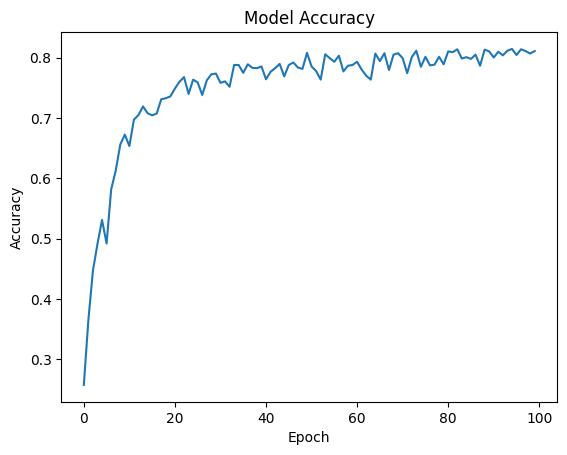

In [ ]:
plt.plot(history.history['accuracy'])

# Set the title and label the axes.
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

Evaluate the model.

In [ ]:
# Predict the model via the training set and testing set.
y_train_pred = model.predict(categorical_inputs_train + [continuous_data_train])
y_test_pred = model.predict(categorical_inputs_test + [continuous_data_test])

y_train_pred = np.argmax(y_train_pred, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("Training set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_train, y_train_pred)
print("Training set r2 score: {:5.2f}".format(r2_test))

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:", accuracy)

Training set Mean Abs Error:  0.41
Training set r2 score:  0.64
Accuracy: 0.8293838862559242


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_test, y_test_pred)
print("Testing set r2 score: {:5.2f}".format(r2_test))

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Testing set Mean Abs Error:  0.45
Testing set r2 score:  0.64
Accuracy: 0.8037825059101655


Display the confusion matrix in training set.

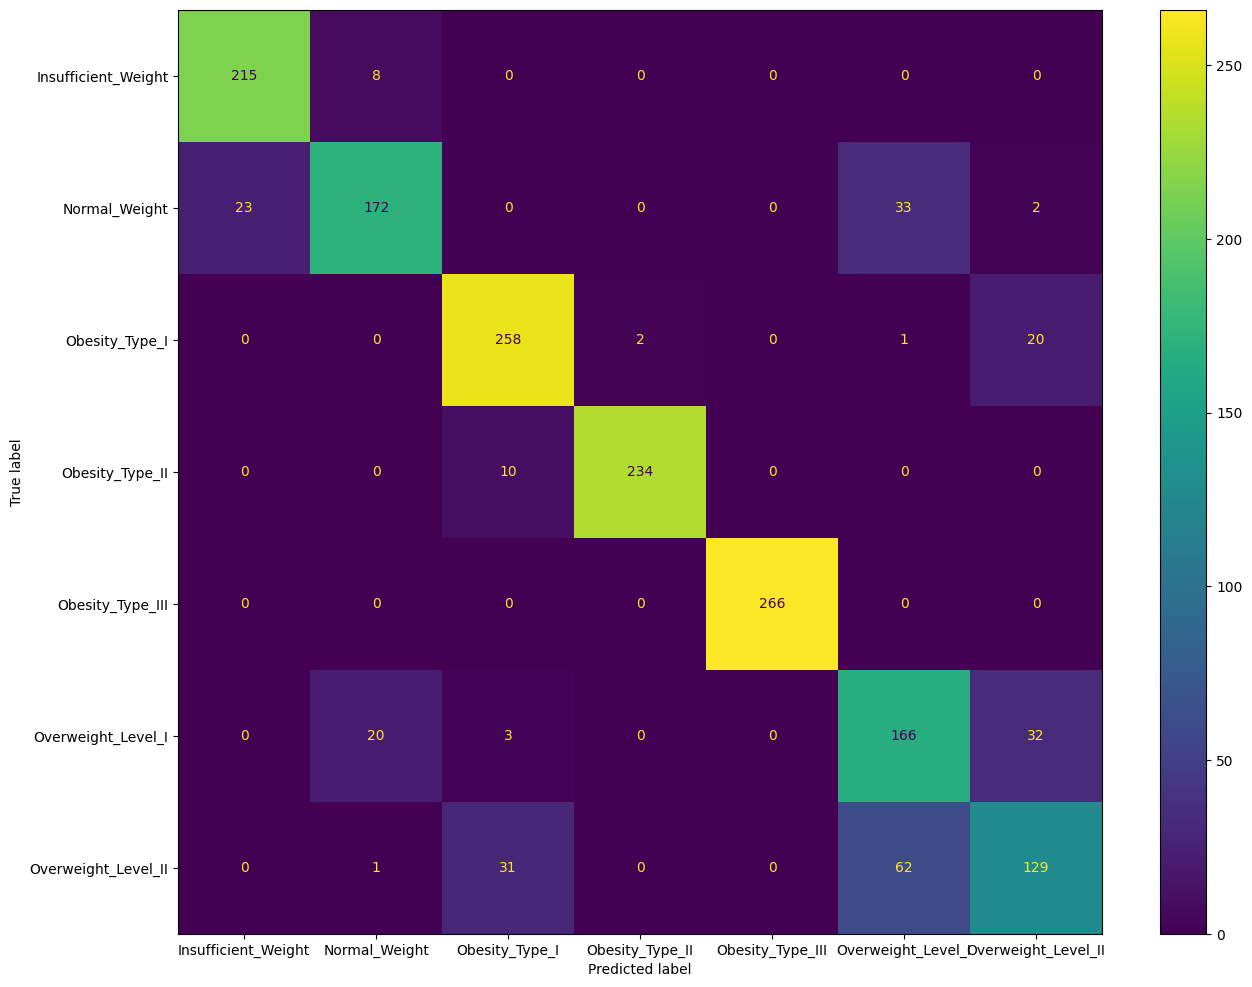

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12), dpi = 100)
cm = metrics.confusion_matrix(y_train, y_train_pred)
cmd = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II",
                                "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
cmd.plot(ax = axes)

Display the confusion matrix in testing set.

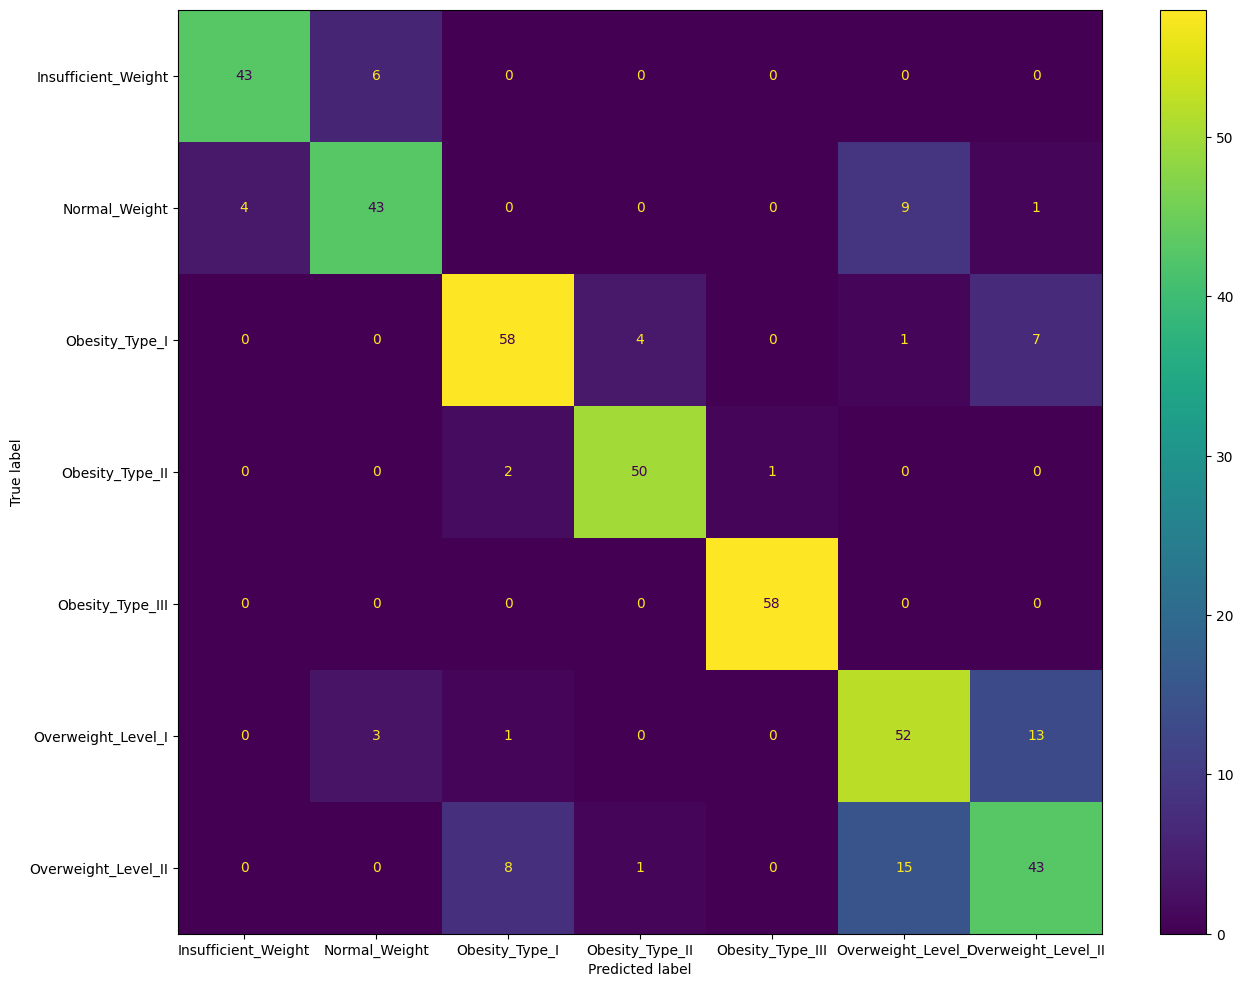

In [ ]:
fig, axes = plt.subplots(figsize=(15, 12), dpi = 100)
cm = metrics.confusion_matrix(y_test, y_test_pred)
cmd = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II",
                                "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
cmd.plot(ax = axes)

Save and reload the pretrained model.

In [ ]:
model.save("FNN_model.h5")

In [ ]:
model = load_model("FNN_model.h5", custom_objects={'initialize_weights': regularizers.l2(0.01)})